In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

folder='project/data/'
# combining all fields' publication record data in a single file
pubrecords=pd.DataFrame()

data=pd.read_csv(folder + 'Chemistry publication record.csv',encoding="ISO-8859-1", header=0)
data['Field']='Chemistry'
pubrecords=pubrecords.append(data)

data=pd.read_csv(folder + 'Physics publication record.csv',encoding="ISO-8859-1", header=0)
data['Field']='Physics'
pubrecords=pubrecords.append(data)

data=pd.read_csv(folder + 'Medicine publication record.csv',encoding="ISO-8859-1", header=0)
data['Field']='Medicine'
pubrecords=pubrecords.append(data)


,Laureate ID,Laureate name,Prize year,Title,Pub year,Paper ID,DOI,Journal,Affiliation,Is prize-winning paper,Field
0,20001,"stoddart, j",2016,a molecular shuttle,1991.0,1.976039e+09,10.1021/ja00013a096,journal of the american chemical society,northwestern university,YES,Chemistry
1,20001,"stoddart, j",2016,chemical synthesis of nanostructures,1993.0,1.963538e+09,10.1557/PROC-330-57,mrs proceedings,northwestern university,NO,Chemistry
2,20001,"stoddart, j",2016,formation and x ray crystal structure of pt h2...,1981.0,1.963552e+09,10.1039/C39810000851,journal of the chemical society chemical commu...,northwestern university,NO,Chemistry
3,20001,"stoddart, j",2016,single walled carbon nanotubes under the influ...,2005.0,2.095637e+09,10.1002/smll.200400070,small,northwestern university,NO,Chemistry
4,20001,"stoddart, j",2016,synthesis of medium heterocyclic rings from 6 ...,1974.0,2.095679e+09,10.1016/S0008-6215(00)82105-9,carbohydrate research,northwestern university,NO,Chemistry


In [526]:
pubrecords.to_csv(folder+'publication_records.csv',index=False)

PermissionError: [Errno 13] Permission denied: 'project/data/publication_records.csv'

In [527]:
# finding the publication records before the prize announcement year
pubrecords_bfr_prz=pubrecords[pubrecords['Pub year']<pubrecords['Prize year']]


,Laureate ID,Laureate name,Prize year,Title,Pub year,Paper ID,DOI,Journal,Affiliation,Is prize-winning paper,Field
0,20001,"stoddart, j",2016,a molecular shuttle,1991.0,1.976039e+09,10.1021/ja00013a096,journal of the american chemical society,northwestern university,YES,Chemistry
1,20001,"stoddart, j",2016,chemical synthesis of nanostructures,1993.0,1.963538e+09,10.1557/PROC-330-57,mrs proceedings,northwestern university,NO,Chemistry
2,20001,"stoddart, j",2016,formation and x ray crystal structure of pt h2...,1981.0,1.963552e+09,10.1039/C39810000851,journal of the chemical society chemical commu...,northwestern university,NO,Chemistry
3,20001,"stoddart, j",2016,single walled carbon nanotubes under the influ...,2005.0,2.095637e+09,10.1002/smll.200400070,small,northwestern university,NO,Chemistry
4,20001,"stoddart, j",2016,synthesis of medium heterocyclic rings from 6 ...,1974.0,2.095679e+09,10.1016/S0008-6215(00)82105-9,carbohydrate research,northwestern university,NO,Chemistry


In [547]:
pubyear=pubrecords_bfr_prz.groupby(['Laureate ID'])['Pub year']
przyear=pubrecords_bfr_prz.groupby(['Laureate ID'])['Prize year']
pub_range=(przyear.max()-pubyear.min()+1).sort_values()


Laureate ID
10181      2.0
30184      2.0
10187      2.0
10185      3.0
10186      3.0
20118      3.0
10188      3.0
20160      3.0
30185      4.0
20156      4.0
20153      4.0
10165      4.0
20150      4.0
10129      4.0
10168      5.0
10164      5.0
30156      5.0
30168      5.0
20142      5.0
20151      5.0
20152      6.0
20137      6.0
30161      6.0
30170      6.0
10079      6.0
10193      7.0
20163      7.0
30178      7.0
30086      7.0
10076      7.0
         ...  
20032     54.0
20046     54.0
30035     54.0
20047     54.0
20005     54.0
10036     54.0
30102     55.0
10028     55.0
30012     55.0
10078     55.0
30052     55.0
20083     56.0
10059     56.0
10029     56.0
30016     57.0
30076     58.0
30120     58.0
20078     59.0
30045     60.0
10001     60.0
30025     60.0
10021     61.0
20012     62.0
10010     63.0
30160     74.0
30162     84.0
10173    102.0
30004    107.0
20048    112.0
30130    113.0
Length: 545, dtype: float64

In [550]:
# creating distribution of time slots laureates published papers before the prize
lauraetes_distrb=[[],[]]
timeslot=5
for i in range(int(pub_range.max()/timeslot)+1):
    lauraetes_distrb[0].append(pub_range[(pub_range>(i*timeslot))&(pub_range<((i+1)*timeslot))].count())
    lauraetes_distrb[1].append(str(timeslot*i)+'-'+str(timeslot*(i+1)))
lauraetes_distrb=pd.DataFrame({'laureates_numbers':lauraetes_distrb[0], 'timeslots':lauraetes_distrb[1]})


,laureates_numbers,timeslots
0,14,0-5
1,20,5-10
2,44,10-15
3,43,15-20
4,64,20-25
5,62,25-30
6,44,30-35
7,37,35-40
8,50,40-45
9,24,45-50


Text(0, 0.5, 'Number of Nobel Laureates')

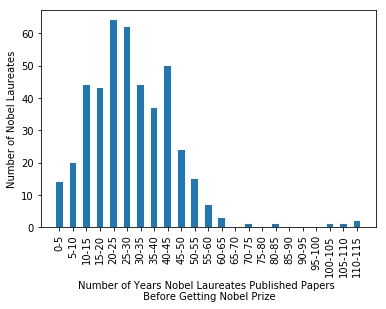

In [551]:
#plotting the first figure
plt.bar(lauraetes_distrb['timeslots'],lauraetes_distrb['laureates_numbers'], align='center', alpha=1, width=0.5)
plt.tick_params(axis='x', rotation=90)
plt.xlabel('Number of Years Nobel Laureates Published Papers \n Before Getting Nobel Prize') 
plt.ylabel('Number of Nobel Laureates')
 

In [533]:
univ_nobels_papers=pd.DataFrame()
univ_nobels_papers['University_Institute']=pubrecords['Affiliation'].value_counts().index

# find number of publications for each university/institution
univ_nobels_papers['Number_of_publications']=pubrecords['Affiliation'].value_counts().values
univ_nobels_papers=univ_nobels_papers.sort_values('University_Institute')

# find number of prizes for each university/institution
x=pubrecords.sort_values('Affiliation')
univ_nobels_papers['Number_of_Nobels']=x.groupby(['Affiliation','Prize year'])['Affiliation'].unique().value_counts().sort_index().values 
univ_nobels_papers=univ_nobels_papers.sort_values('Number_of_Nobels', ascending=False)


,University_Institute,Number_of_publications,Number_of_Nobels
0,harvard university,4773,35
2,stanford university,3196,26
19,university of cambridge,993,25
3,california institute of technology,2646,21
15,university of california berkeley,1072,20


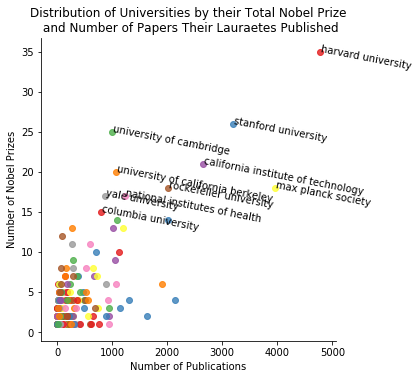

In [538]:
## plotting the second figure
p1=sn.lmplot( x="Number_of_publications", y="Number_of_Nobels", data=univ_nobels_papers, fit_reg=False, hue='University_Institute', legend=False, palette="Set1")

plt.title('Distribution of Universities by their Total Nobel Prize\n and Number of Papers Their Lauraetes Published')
# Setting x-axis label
plt.xlabel('Number of Publications')
# Setting y-axis label
plt.ylabel('Number of Nobel Prizes')
for line in range(0,10):
     plt.text(univ_nobels_papers.Number_of_publications.iloc[line]+0.2, 
     univ_nobels_papers.Number_of_Nobels.iloc[line], 
     univ_nobels_papers.University_Institute.iloc[line], horizontalalignment='left', size='medium', color='black', 
     weight='light', rotation=-11)

Text(0, 0.5, 'Number of Nobels')

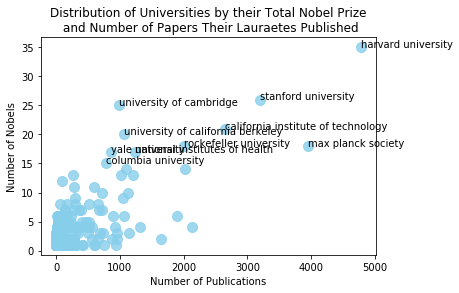

In [511]:
p1=sn.regplot(data=univ_nobels_papers, x="Number_of_publications", y="Number_of_Nobels", fit_reg=False, marker="o", color="skyblue", scatter_kws={'s':100})
for line in range(0,10):
     p1.text(univ_nobels_papers.Number_of_publications.iloc[line]+0.2, 
     univ_nobels_papers.Number_of_Nobels.iloc[line], 
     univ_nobels_papers.University_Institute.iloc[line], horizontalalignment='left', size='medium', color='black', 
     weight='light')

plt.title('Distribution of Universities by their Total Nobel Prize\n and Number of Papers Their Lauraetes Published')
# Setting x-axis label
plt.xlabel('Number of Publications')
# Setting y-axis label
plt.ylabel('Number of Nobels')